In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [3]:
car_data = pd.read_csv('fuel_efficiency_data.csv')
print(car_data.tail(7))
print(car_data.describe())

    Engine_Size_Liters  Fuel_Efficiency_MPG
93            4.757576            26.483313
94            4.797980            24.691054
95            4.838384            24.029591
96            4.878788            26.206605
97            4.919192            26.501588
98            4.959596            23.633990
99            5.000000            23.923769
       Engine_Size_Liters  Fuel_Efficiency_MPG
count          100.000000           100.000000
mean             3.000000            35.116328
std              1.172181             6.290352
min              1.000000            22.505760
25%              2.000000            29.886659
50%              3.000000            35.666563
75%              4.000000            39.902106
max              5.000000            45.990208


In [4]:
indp_vars = car_data[['Engine_Size_Liters']]
dep_var = car_data['Fuel_Efficiency_MPG']

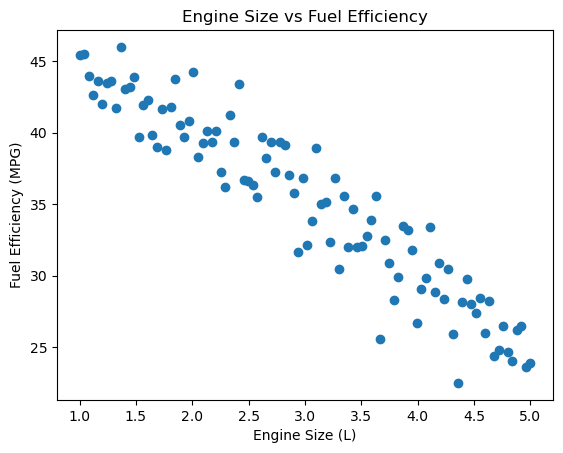

In [5]:
plt.scatter(indp_vars, dep_var)
plt.xlabel("Engine Size (L)")
plt.ylabel("Fuel Efficiency (MPG)")
plt.title("Engine Size vs Fuel Efficiency")
plt.show()

In [6]:
train_x, test_x, train_y, test_y = train_test_split(indp_vars, dep_var, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(train_x, train_y)
pred = lr_model.predict(test_x)

In [7]:
mse = mean_squared_error(pred, test_y)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.570596048538351


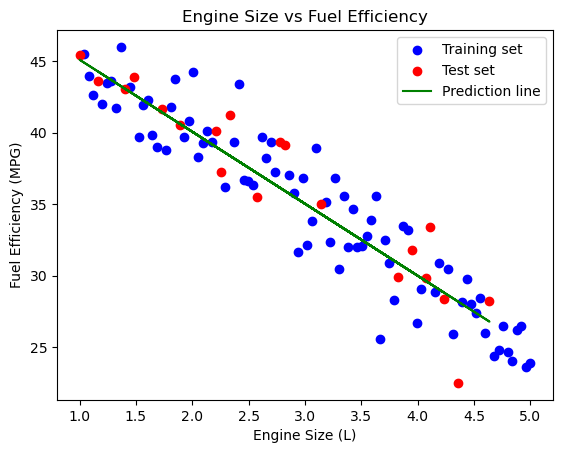

In [8]:
plt.scatter(train_x, train_y, color='blue', label='Training set')
plt.scatter(test_x, test_y, color='red', label='Test set')
plt.plot(test_x, pred, color="green", label="Prediction line")
plt.legend()
plt.xlabel("Engine Size (L)")
plt.ylabel("Fuel Efficiency (MPG)")
plt.title("Engine Size vs Fuel Efficiency")
plt.show()

In [10]:
new_entry = input("Please enter an engine size in liters: ")
new_entry = np.array([[float(new_entry)]])
pred_new = lr_model.predict(new_entry)
print("Predicted Fuel Efficiency (MPG):", pred_new)

Please enter an engine size in liters:  3


Predicted Fuel Efficiency (MPG): [35.02751255]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [12]:
df = pd.read_csv("student_performance.csv")

In [13]:
print(df.head())
print(df.info())
print(df.describe())

   student_id  weekly_self_study_hours  attendance_percentage  \
0           1                     18.5                   95.6   
1           2                     14.0                   80.0   
2           3                     19.5                   86.3   
3           4                     25.7                   70.2   
4           5                     13.4                   81.9   

   class_participation  total_score grade  
0                  3.8         97.9     A  
1                  2.5         83.9     B  
2                  5.3        100.0     A  
3                  7.0        100.0     A  
4                  6.9         92.0     A  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   atten

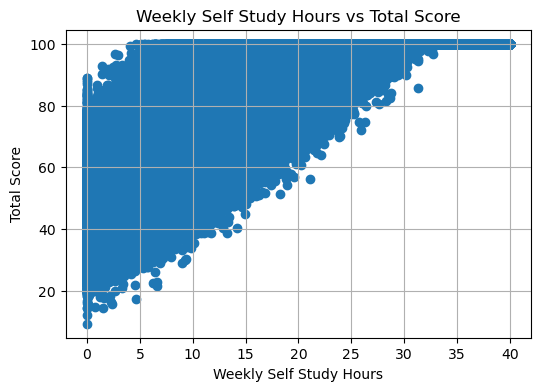

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df['weekly_self_study_hours'], df['total_score'])
plt.title('Weekly Self Study Hours vs Total Score')
plt.xlabel('Weekly Self Study Hours')
plt.ylabel('Total Score')
plt.grid(True)
plt.show()

In [15]:
corr = df['weekly_self_study_hours'].corr(df['total_score'])
print(f"Pearson correlation: {corr:.4f}")

Pearson correlation: 0.8122


In [16]:
X = df[['weekly_self_study_hours']]   # independent variable
y = df['total_score']                 # dependent variable

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (700000, 1) Test size: (300000, 1)


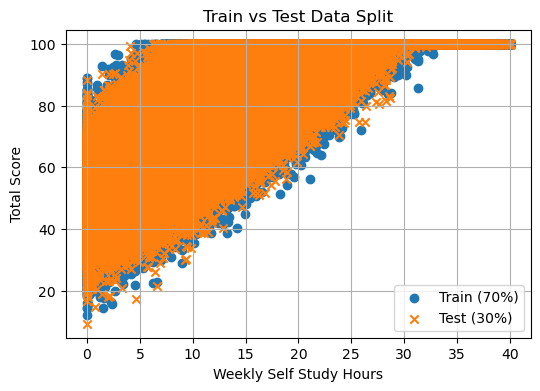

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, label='Train (70%)')
plt.scatter(X_test, y_test, marker='x', label='Test (30%)')
plt.xlabel('Weekly Self Study Hours')
plt.ylabel('Total Score')
plt.title('Train vs Test Data Split')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(f"Equation: total_score = {model.intercept_:.2f} + {model.coef_[0]:.2f} * weekly_self_study_hours")

Intercept: 56.97
Slope: 1.82
Equation: total_score = 56.97 + 1.82 * weekly_self_study_hours


In [20]:
y_pred = model.predict(X_test)

In [21]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Evaluation metrics on Test Set:")
print(f"R^2: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Evaluation metrics on Test Set:
R^2: 0.6599
MAE: 7.16
MSE: 80.83
RMSE: 8.99


In [22]:
results = pd.DataFrame({
    'weekly_self_study_hours': X_test['weekly_self_study_hours'],
    'Actual total_score': y_test,
    'Predicted total_score': y_pred,
    'Residual': y_test - y_pred
})
print(results.sort_values('weekly_self_study_hours'))

        weekly_self_study_hours  Actual total_score  Predicted total_score  \
645760                      0.0                51.6              56.970614   
543201                      0.0                53.6              56.970614   
826288                      0.0                48.3              56.970614   
318861                      0.0                60.6              56.970614   
79662                       0.0                38.6              56.970614   
...                         ...                 ...                    ...   
264709                     40.0               100.0             129.643047   
425349                     40.0               100.0             129.643047   
428200                     40.0               100.0             129.643047   
52813                      40.0               100.0             129.643047   
215056                     40.0               100.0             129.643047   

         Residual  
645760  -5.370614  
543201  -3.370614  
826

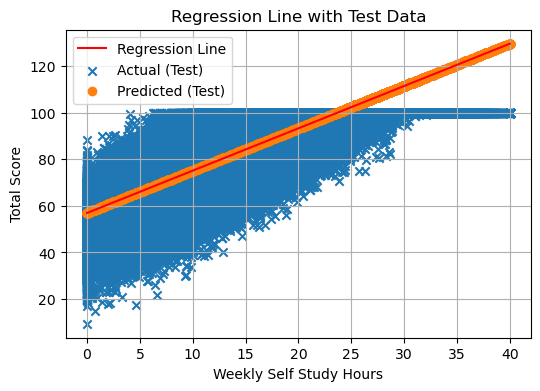

In [23]:
plt.figure(figsize=(6,4))
# Regression line
X_range = np.linspace(df['weekly_self_study_hours'].min(), df['weekly_self_study_hours'].max(), 200).reshape(-1,1)
plt.plot(X_range, model.predict(X_range), color='red', label='Regression Line')
# Actual vs predicted points
plt.scatter(X_test, y_test, marker='x', label='Actual (Test)')
plt.scatter(X_test, y_pred, marker='o', label='Predicted (Test)')
plt.xlabel('Weekly Self Study Hours')
plt.ylabel('Total Score')
plt.title('Regression Line with Test Data')
plt.legend()
plt.grid(True)
plt.show()

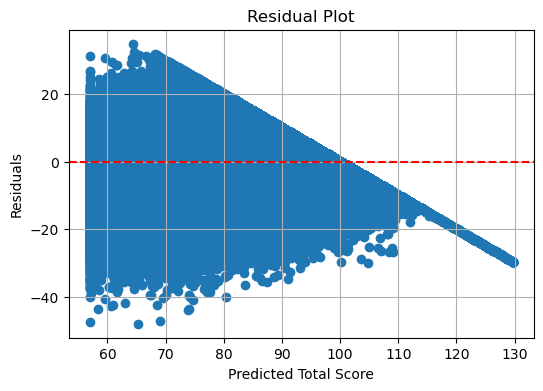

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Total Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()